#  Prediction of Parkinson's Disease Using Machine Learning

# IMPORTING LIBARIES

In [ ]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data1=pd.read_csv('/content/drive/MyDrive/Copy of parkinsons_updrs.data.csv')

In [ ]:
data=data1.copy()

In [ ]:
data.drop('index', inplace=True, axis=1)

In [ ]:
data.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [ ]:
data.tail()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
5870,42,61,0,142.79,22.485,33.485,0.00406,0.000031,0.00167,0.00168,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.84,21.988,32.988,0.00297,0.000025,0.00119,0.00147,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.82,21.495,32.495,0.00349,0.000025,0.00152,0.00187,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.73,21.007,32.007,0.00281,0.000020,0.00128,0.00151,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204
5874,42,61,0,170.73,20.513,31.513,0.00282,0.000021,0.00135,0.00166,...,0.171,0.00946,0.01154,0.01470,0.02839,0.008172,23.259,0.58608,0.57077,0.15336


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

In [ ]:
data.describe()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


In [ ]:
data.shape

(5875, 22)

In [ ]:
data.isnull().sum()

subject#         0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

In [ ]:
data.dtypes

subject#           int64
age                int64
sex                int64
test_time        float64
motor_UPDRS      float64
total_UPDRS      float64
Jitter(%)        float64
Jitter(Abs)      float64
Jitter:RAP       float64
Jitter:PPQ5      float64
Jitter:DDP       float64
Shimmer          float64
Shimmer(dB)      float64
Shimmer:APQ3     float64
Shimmer:APQ5     float64
Shimmer:APQ11    float64
Shimmer:DDA      float64
NHR              float64
HNR              float64
RPDE             float64
DFA              float64
PPE              float64
dtype: object

# DATA VISUALIZATION

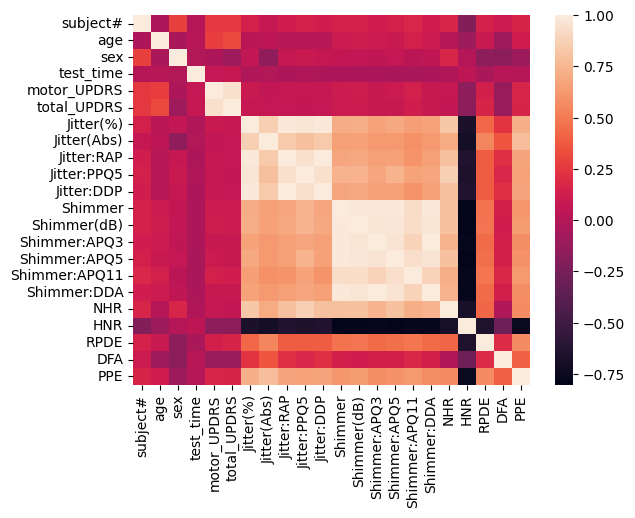

In [ ]:
sns.heatmap(data.corr())
sns.set(font_scale=0.25)
plt.show()

In [ ]:
data.columns

Index(['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS',
       'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')

In [ ]:
data['age'].unique()

array([72, 58, 57, 74, 75, 63, 73, 68, 55, 62, 65, 66, 67, 59, 60, 76, 49,
       78, 36, 71, 56, 85, 61])

In [ ]:
data['sex'].unique()

array([0, 1])

In [ ]:
data.rename(columns={'subject#' : 'subject'}, inplace=True)

In [ ]:
data['subject'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42])

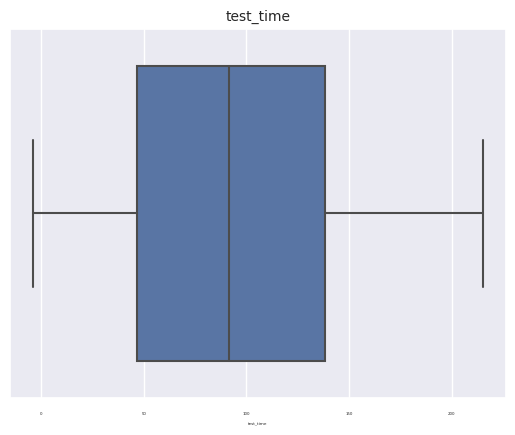

In [ ]:
sns.boxplot(x=data.test_time)
plt.title('test_time', fontsize = 10)
plt.show()

<Axes: >

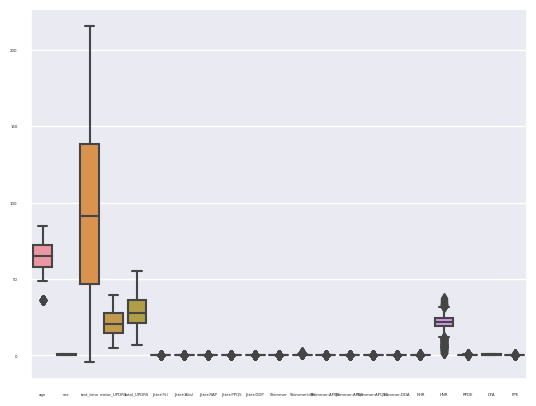

In [ ]:
sns.boxplot(data=data[[ 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS',
       'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']], orient="V")

<Axes: >

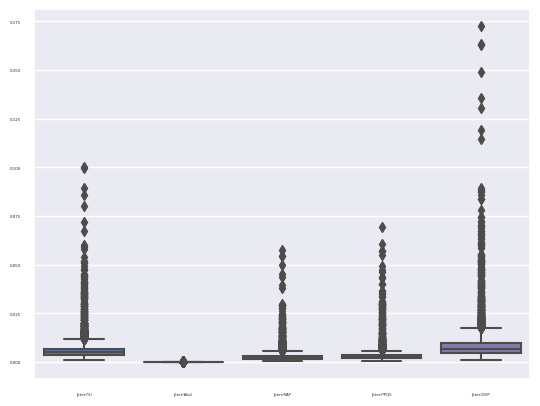

In [ ]:
sns.boxplot(data=data[['Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP']], orient="V")

In [ ]:
data.rename(columns={'Jitter(%)' : 'Jitter'}, inplace=True)

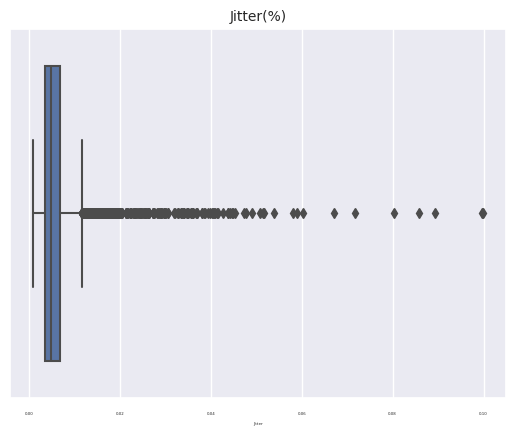

In [ ]:
sns.boxplot(x=data.Jitter)
plt.title('Jitter(%)', fontsize = 10)
plt.show()

# TRAINING AND TESTING



In [ ]:
X=data[[ 'age', 'test_time', 'motor_UPDRS', 'total_UPDRS',
       'Jitter', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']]
Y=data[['sex']]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.2, random_state= 4)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
LogReg=LogisticRegression()
DT = DecisionTreeClassifier() #storing the classifer in dt
RF = RandomForestClassifier(n_estimators=10)
SVM= SVC(kernel= 'poly', degree=2)

In [ ]:
#fitting tHe model
LogReg.fit(x_train,y_train)
DT.fit(x_train,y_train)
RF.fit(x_train,y_train)
SVM.fit(x_train,y_train)

SVC(degree=2, kernel='poly')

In [ ]:
print(LogReg.score(x_train,y_train))
LogReg.score(x_test,y_test)

0.7038297872340425


0.691063829787234

In [ ]:
print(DT.score(x_train,y_train))
DT.score(x_test,y_test)


1.0


0.9591489361702128

In [ ]:
#so our model is overfitting

In [ ]:
print(RF.score(x_train,y_train))
RF.score(x_test,y_test)


0.997872340425532


0.9548936170212766

In [ ]:
#so our model is overfitting

In [ ]:
print(SVM.score(x_train,y_train))
SVM.score(x_test,y_test)

0.685531914893617


0.668936170212766

In [ ]:
new_predict1=LogReg.predict([[72,5.6431,28.199,34.398,0.00662,3.38E-05,0.00401,0.00317,0.01204,0.02565,0.23,0.01438,0.01309,0.01662,0.04314,0.01429,21.64,0.41888,0.54842,0.16006]])
print('new_predict LogReg',new_predict1)
new_predict2=DT.predict([[72,5.6431,28.199,34.398,0.00662,3.38E-05,0.00401,0.00317,0.01204,0.02565,0.23,0.01438,0.01309,0.01662,0.04314,0.01429,21.64,0.41888,0.54842,0.16006]])
print('new_predict DT',new_predict2)
new_predict3=RF.predict([[72,5.6431,28.199,34.398,0.00662,3.38E-05,0.00401,0.00317,0.01204,0.02565,0.23,0.01438,0.01309,0.01662,0.04314,0.01429,21.64,0.41888,0.54842,0.16006]])
print('new_predict RF',new_predict3)
new_predict6=SVM.predict([[72,5.6431,28.199,34.398,0.00662,3.38E-05,0.00401,0.00317,0.01204,0.02565,0.23,0.01438,0.01309,0.01662,0.04314,0.01429,21.64,0.41888,0.54842,0.16006]])
print('new_predict SVM',new_predict6)

new_predict LogReg [0]
new_predict DT [0]
new_predict RF [0]
new_predict SVM [0]


In [ ]:
new_predict7=LogReg.predict([[73,162.61,22.104,28.104,0.00319,1.75E-05,0.0014,0.00152,0.00419,0.01969,0.193,0.00994,0.01186,0.01634,0.02981,0.025368,24.133,0.54047,0.62628,0.18905]])
print('new_predict2 LogReg',new_predict7)
new_predict8=DT.predict([[73,162.61,22.104,28.104,0.00319,1.75E-05,0.0014,0.00152,0.00419,0.01969,0.193,0.00994,0.01186,0.01634,0.02981,0.025368,24.133,0.54047,0.62628,0.18905]])
print('new_predict2 DT',new_predict8)
new_predict9=RF.predict([[73,162.61,22.104,28.104,0.00319,1.75E-05,0.0014,0.00152,0.00419,0.01969,0.193,0.00994,0.01186,0.01634,0.02981,0.025368,24.133,0.54047,0.62628,0.18905]])
print('new_predict2 RF',new_predict9)
new_predict12=SVM.predict([[73,162.61,22.104,28.104,0.00319,1.75E-05,0.0014,0.00152,0.00419,0.01969,0.193,0.00994,0.01186,0.01634,0.02981,0.025368,24.133,0.54047,0.62628,0.18905]])
print('new_predict2 SVM',new_predict12)

new_predict2 LogReg [0]
new_predict2 DT [1]
new_predict2 RF [1]
new_predict2 SVM [0]


In [ ]:
from sklearn.ensemble import VotingClassifier
EVC = VotingClassifier(estimators=[('lr',LogReg),('dt',DT),("rf",RF),('svm',SVM)],voting='hard')

In [ ]:
EVC.fit(x_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('rf', RandomForestClassifier(n_estimators=10)),
                             ('svm', SVC(degree=2, kernel='poly'))])

In [ ]:
print(EVC.score(x_train,y_train))
EVC.score(x_test,y_test)

0.7410638297872341


0.7259574468085106

In [ ]:
new_predict=EVC.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,new_predict)
print(cm)

[[781   5]
 [317  72]]


In [ ]:
new_predict7=EVC.predict([[72,5.6431,28.199,34.398,0.00662,3.38E-05,0.00401,0.00317,0.01204,0.02565,0.23,0.01438,0.01309,0.01662,0.04314,0.01429,21.64,0.41888,0.54842,0.16006]])
print('new_predict EVC',new_predict7)

new_predict EVC [0]


In [ ]:
new_predict27=EVC.predict([[73,162.61,22.104,28.104,0.00319,1.75E-05,0.0014,0.00152,0.00419,0.01969,0.193,0.00994,0.01186,0.01634,0.02981,0.025368,24.133,0.54047,0.62628,0.18905]])
print('new_predict EVC',new_predict27)

new_predict EVC [0]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=7,leaf_size=20,metric="euclidean")
clf.fit(x_train,y_train)
#clf.fit(iris.data, iris.target)

KNeighborsClassifier(leaf_size=20, metric='euclidean', n_neighbors=7)

In [ ]:
print(" Acc_training=",clf.score(x_train,y_train))
print(" Acc_Test=",clf.score(x_test, y_test))

 Acc_training= 0.9691489361702128
 Acc_Test= 0.9353191489361702


In [ ]:
print("Predicted Data")
print(clf.predict(x_test))

Predicted Data
[0 0 0 ... 0 1 0]


In [ ]:
prediction=clf.predict(x_test)


In [ ]:
cm=confusion_matrix(y_test,prediction)
print(cm)

[[758  28]
 [ 48 341]]


In [ ]:
y_new=clf.predict([[72,5.6431,28.199,34.398,0.00662,3.38E-05,0.00401,0.00317,0.01204,0.02565,0.23,0.01438,0.01309,0.01662,0.04314,0.01429,21.64,0.41888,0.54842,0.16006]])
y_new

array([1])

In [ ]:
data2=data1.copy()

# outlier detection

In [ ]:
Q1 = data2[j].quantile(0.25)
Q3 = data2.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

index            2937.000000
subject#           23.000000
age                14.000000
sex                 1.000000
test_time          91.597500
motor_UPDRS        12.596500
total_UPDRS        15.028000
Jitter(%)           0.003220
Jitter(Abs)         0.000031
Jitter:RAP          0.001710
Jitter:PPQ5         0.001640
Jitter:DDP          0.005140
Shimmer             0.020630
Shimmer(dB)         0.190000
Shimmer:APQ3        0.011295
Shimmer:APQ5        0.012965
Shimmer:APQ11       0.017050
Shimmer:DDA         0.033905
NHR                 0.020508
HNR                 5.038000
RPDE                0.144260
DFA                 0.115155
PPE                 0.108150
dtype: float64


In [ ]:
data2.rename(columns={'Jitter(%)' :'Jitter'}, inplace=True)

In [ ]:
 df2["Jitter"]=data2["Jitter"].copy()

In [ ]:
df2["Jitter"]= df2["Jitter"][~((df2["Jitter"] < (Q1 - 1.5 * IQR)) |(df2["Jitter"] > (Q3 + 1.5 * IQR))).any(axis=1)]
df2["Jitter"].head(5)

ValueError: ignored

In [ ]:
# df2.shape

In [ ]:
# df2.drop('index', inplace=True, axis=1)
# df2.head(5)

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


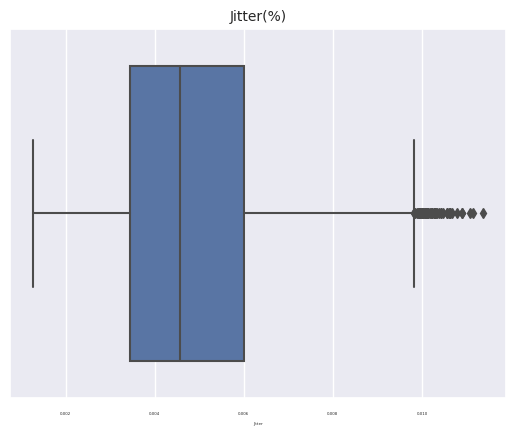

In [ ]:
sns.boxplot(x=df2.Jitter)
plt.title('Jitter(%)', fontsize = 10)
plt.show()